In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [3]:
clv_df = pd.read_csv('/content/sample_data/bank_clv_dataset.csv')

In [4]:
clv_df.head()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375
2,1003,75,150,0,25,75,25,5156
3,1004,200,200,25,100,75,150,11756
4,1005,200,200,125,75,175,200,15525


In [5]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  100 non-null    int64
 1   MONTH_1  100 non-null    int64
 2   MONTH_2  100 non-null    int64
 3   MONTH_3  100 non-null    int64
 4   MONTH_4  100 non-null    int64
 5   MONTH_5  100 non-null    int64
 6   MONTH_6  100 non-null    int64
 7   CLV      100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


In [6]:
clv_df.isnull().sum()

,0
CUST_ID,0
MONTH_1,0
MONTH_2,0
MONTH_3,0
MONTH_4,0
MONTH_5,0
MONTH_6,0
CLV,0


In [7]:
clv_df.describe()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,113.25000,115.750000,106.250000,106.750000,106.250000,108.500000,9421.190000
std,29.011492,55.32902,64.221739,63.601406,62.649317,59.816111,66.021499,2664.443174
min,1001.000000,25.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4125.000000
25%,1025.750000,75.00000,75.000000,50.000000,50.000000,50.000000,50.000000,7816.000000
50%,1050.500000,100.00000,125.000000,100.000000,100.000000,100.000000,100.000000,9344.000000
75%,1075.250000,150.00000,175.000000,175.000000,150.000000,156.250000,175.000000,10719.250000
max,1100.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,17100.000000


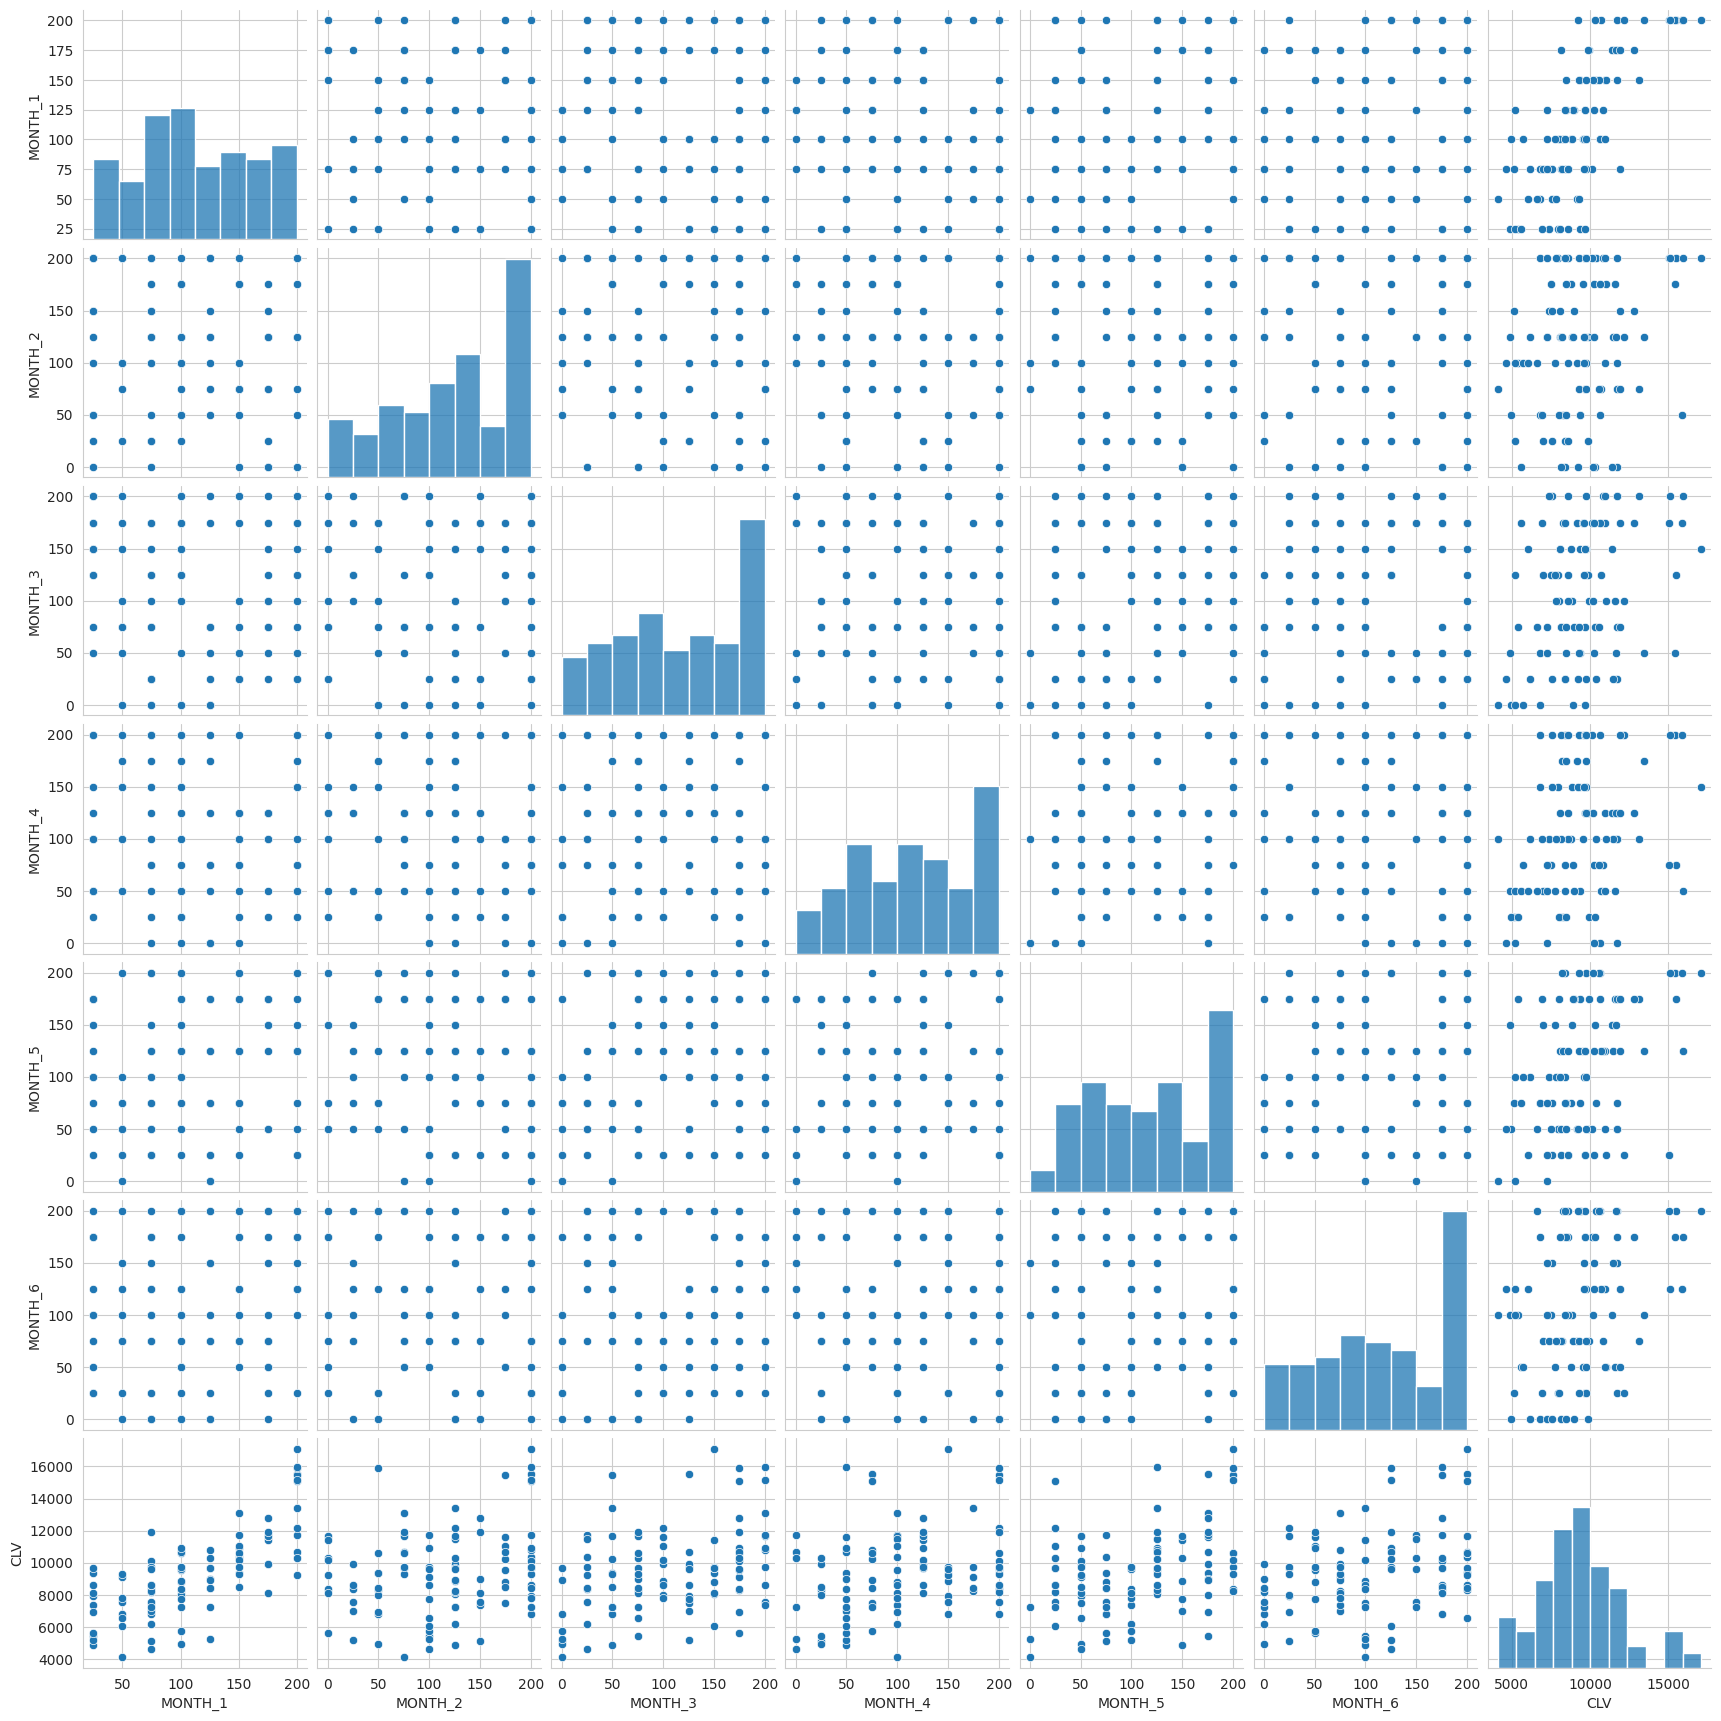

In [9]:
sns.pairplot(clv_df.drop('CUST_ID', axis=1))

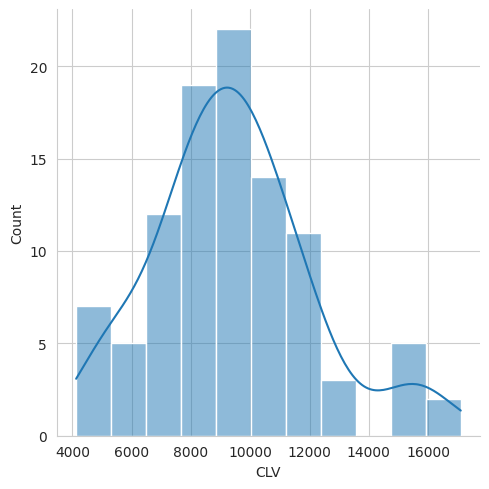

In [10]:
sns.displot(clv_df['CLV'], kde=True)

<Axes: >

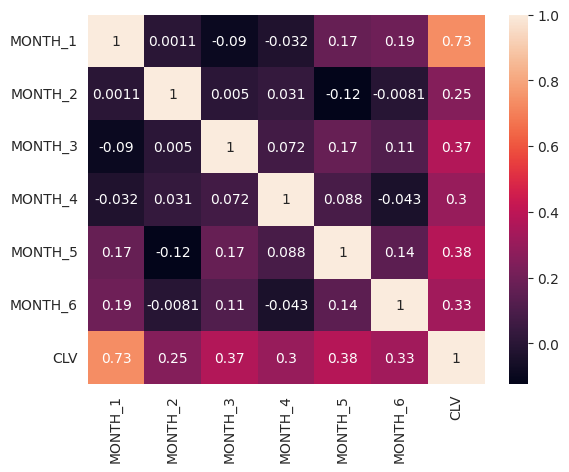

In [11]:
sns.heatmap(clv_df.drop('CUST_ID', axis=1).corr(), annot=True)

In [13]:
# for features
X = clv_df.drop(['CUST_ID', 'CLV'], axis=1)

# for training/test
y = clv_df['CLV']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
print(lr.intercept_)

136.41034157467584


In [22]:
print(lr.coef_)

[35.21787263 12.00526856 15.85875336 10.09465106  7.78551392  3.72715148]


In [23]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coeff'])

cdf

,Coeff
MONTH_1,35.217873
MONTH_2,12.005269
MONTH_3,15.858753
MONTH_4,10.094651
MONTH_5,7.785514
MONTH_6,3.727151


In [24]:
prediction = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

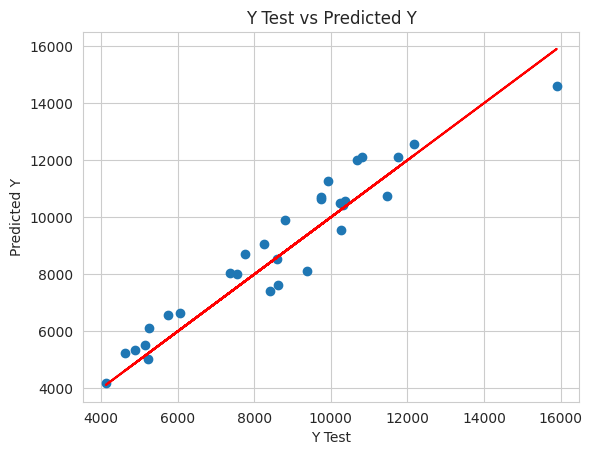

In [26]:
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, color='red')
plt.title('Y Test vs Predicted Y')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<Axes: xlabel='CLV', ylabel='Density'>

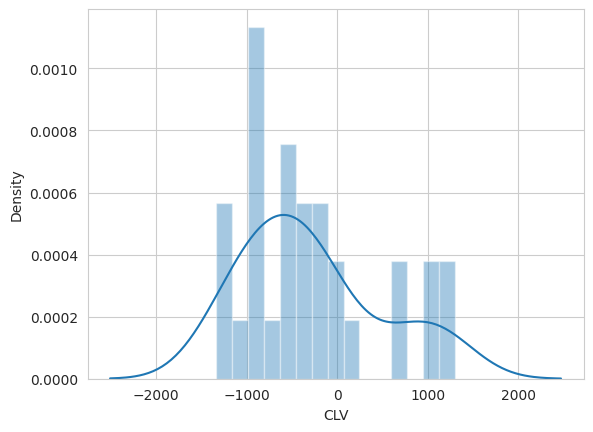

In [35]:
sns.distplot((y_test-prediction), bins=15)

In [37]:
from sklearn import metrics as ms

In [38]:
mse = ms.mean_squared_error(y_test, prediction)
mae = ms.mean_absolute_error(y_test, prediction)
rmse = ms.root_mean_squared_error(y_test, prediction)

In [39]:
print(f'Mean square error: {mse}')
print(f'Mean absolute error: {mae}')
print(f'Root mean square error: {rmse}')

Mean square error: 654790.937155668
Mean absolute error: 704.8564353153521
Root mean square error: 809.1915330474411


In [43]:
# get score

score = ms.r2_score(y_test, prediction)

print(f'R2 score: {score}')

R2 score: 0.9074936273808444
